## This is a notebook to write python scripts to answer the hypothesis questions by visualizations

In [2]:
%pip install prettytable

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable


## Import the complete Dataset from year 2018-2022

In [4]:
indian_startups= pd.read_excel('complete_data.xlsx')
indian_startups

,Company Name,Sector,Stage,Amount,HeadQuarter,Year Funded,Investor,Founded
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,2018,Unknown,NaN
1,Happy Cow Dairy,Agriculture,Seed,5840000,Mumbai,2018,Unknown,NaN
2,MyLoanCare,Credit,Series A,9490000,Gurgaon,2018,Unknown,NaN
3,PayMe India,Financial Services,Angel,2000000,Noida,2018,Unknown,NaN
4,Eunimart,E-Commerce Platforms,Seed,3530000,Hyderabad,2018,Unknown,NaN
...,...,...,...,...,...,...,...,...
2841,Gigforce,Staffing & Recruiting,Pre-series,3000000,Gurugram,2021,Endiya Partners,2019.0
2842,Vahdam,Food & Beverages,Series C,20000000,New Delhi,2021,IIFL AMC,2015.0
2843,Leap Finance,Financial Services,Series C,55000000,Bangalore,2021,Owl Ventures,2019.0
2844,CollegeDekho,EdTech,Series B,26000000,Gurugram,2021,Winter Capital,2015.0


## Inspect the data structure of the whole data

In [5]:
indian_startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2846 non-null   object 
 1   Sector        2846 non-null   object 
 2   Stage         2846 non-null   object 
 3   Amount        2846 non-null   int64  
 4   HeadQuarter   2846 non-null   object 
 5   Year Funded   2846 non-null   int64  
 6   Investor      2846 non-null   object 
 7   Founded       2321 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 178.0+ KB


## Answering the questions the formulated 5 SMART questions:
1. What is the overall trend in funding received by start-ups in India from 2018 to 2021?
2. Which industries or sectors have received the highest funding during this period?
3. What is the distribution of startups across the cities in India?
4. What is the average funding amount received by start-ups in India during this period?
5. Is there a correlation between the funding amount and the number of investors involved in funding rounds?

## Question 1
### What is the overall trend in funding received by start ups in India from 2018-2021

#### In this we visualize the total funding against the years

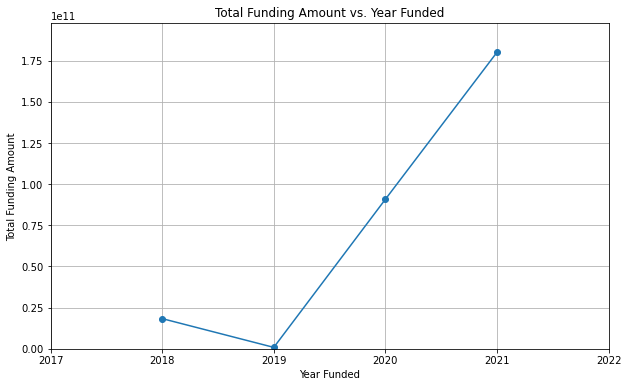

In [19]:
total_funding_per_year = indian_startups.groupby('Year Funded')['Amount'].sum()


# Extract the years and mean funding data for plotting
years = total_funding_per_year.index
total_funding = total_funding_per_year.values

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the mean funding against years using a line graph
plt.plot(years, total_funding, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year Funded')
plt.ylabel('Total Funding Amount')
plt.title('Total Funding Amount vs. Year Funded')

# Optional: Customize the appearance (e.g., grid, axis limits, etc.)
plt.grid(True)
plt.xlim(min(years) - 1, max(years) + 1)  # Set the x-axis limits with some padding
plt.ylim(0, max(total_funding) * 1.1)  # Set the y-axis limits with some padding

# Show the plot
plt.show()


## In this we visualize the total funding amount against the years

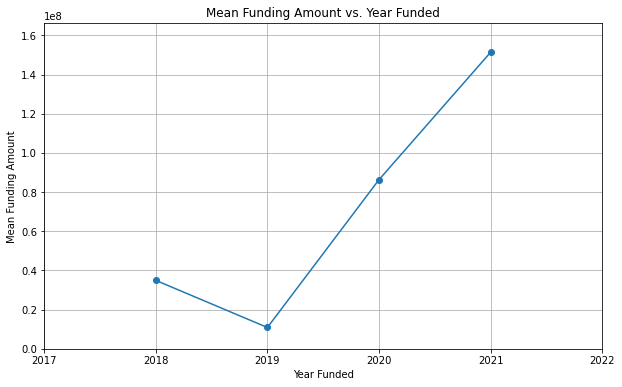

In [7]:
mean_funding_per_year = indian_startups.groupby('Year Funded')['Amount'].mean()


# Calculate the mean funding for each year
mean_funding_per_year = indian_startups.groupby('Year Funded')['Amount'].mean()

# Extract the years and mean funding data for plotting
years = mean_funding_per_year.index
mean_funding = mean_funding_per_year.values

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the mean funding against years using a line graph
plt.plot(years, mean_funding, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year Funded')
plt.ylabel('Mean Funding Amount')
plt.title('Mean Funding Amount vs. Year Funded')

# Optional: Customize the appearance (e.g., grid, axis limits, etc.)
plt.grid(True)
plt.xlim(min(years) - 1, max(years) + 1)  # Set the x-axis limits with some padding
plt.ylim(0, max(mean_funding) * 1.1)  # Set the y-axis limits with some padding

# Show the plot
plt.show()


## Question 2

### Which industries or sectors have received the highest funding during this period?


### We analyze this according to years in mean and sum

### Sum


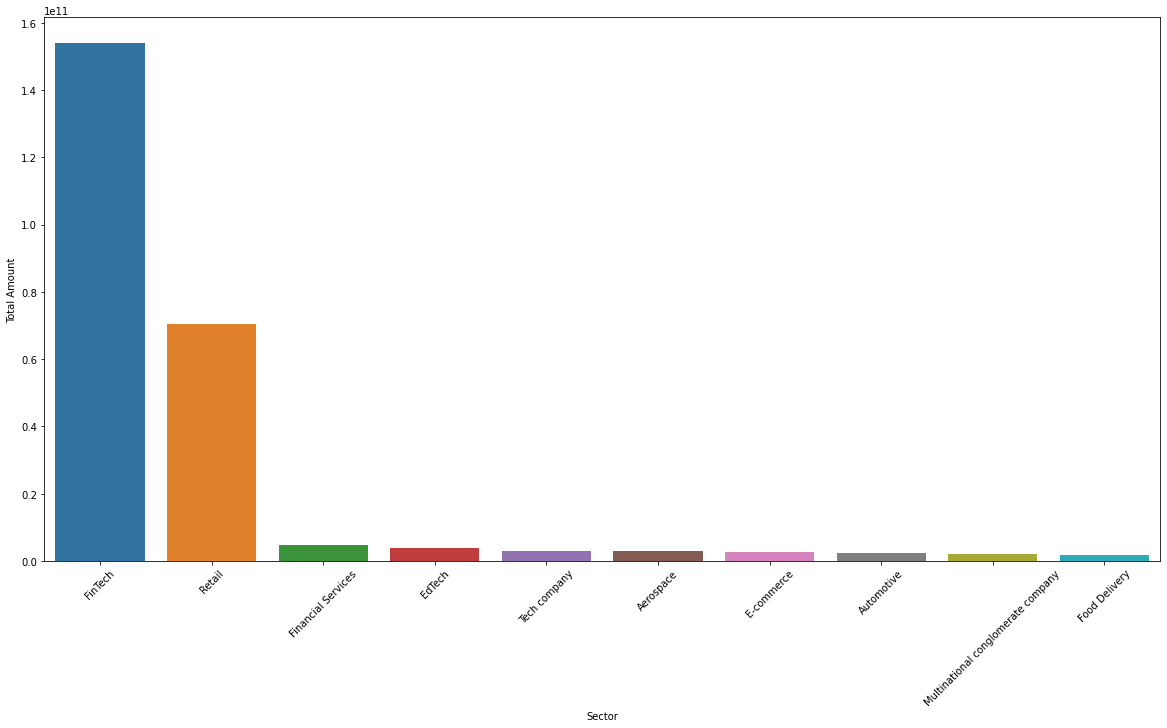

In [35]:
# top 10 sectors
import seaborn as sns
top_10 = pd.DataFrame(indian_startups.groupby('Sector')['Amount'].sum().nlargest(10)).reset_index()

top_10.columns = ['Sector', 'Total Amount'] 

plt.figure(figsize=(20, 10))

sns.barplot(data=top_10, x='Sector', y= 'Total Amount')

plt.xticks(rotation=45);

### Overall mean funding in sectors in all years

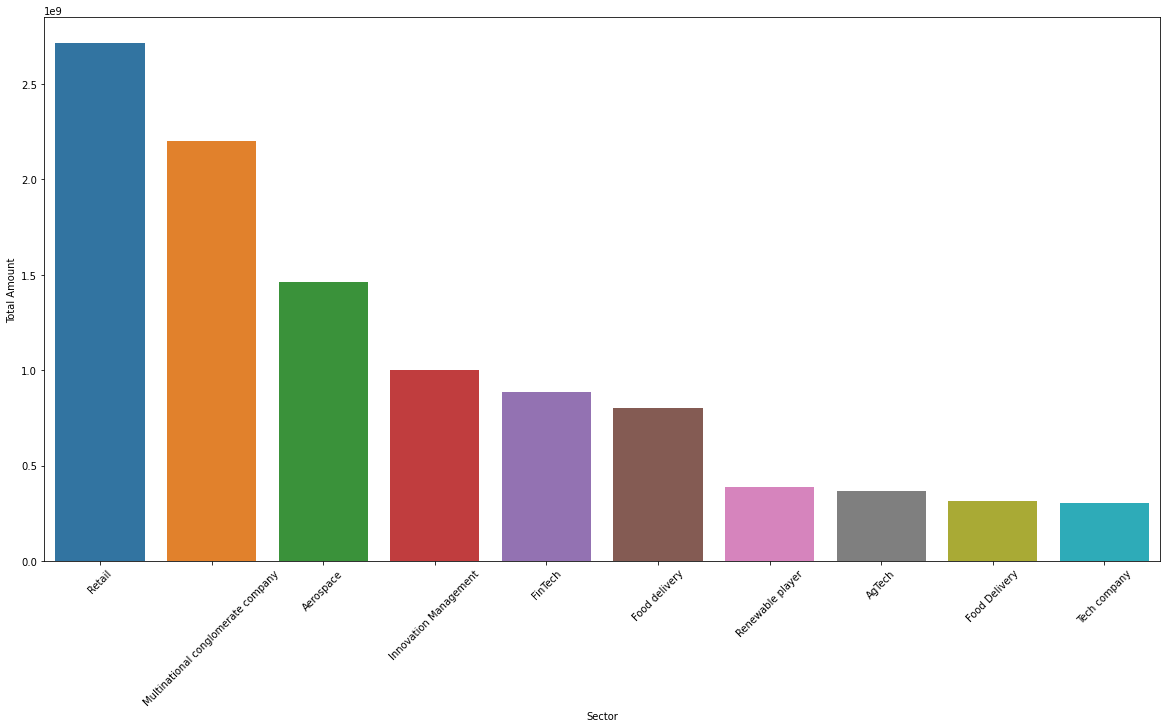

In [37]:


# top 10 sectors




top_10 = pd.DataFrame(indian_startups.groupby('Sector')['Amount'].mean().nlargest(10)).reset_index()
top_10.columns = ['Sector', 'Total Amount']
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10, x='Sector', y= 'Total Amount')

plt.xticks(rotation=45);

## Question 3
### What is the distribution of startups across the cities in India?

### In this we count the number of startups in each sector and use a bar graph to visualize


In [14]:
# Group by 'HeadQuarter' and calculate the number of startups in each headquarters
startup_count_per_hq = indian_startups.groupby('HeadQuarter').size().reset_index(name='Startup Count')

# Sort the DataFrame by 'Startup Count' in descending order
startup_count_per_hq_sorted = startup_count_per_hq.sort_values(by='Startup Count', ascending=False)

startup_count_per_hq_sorted=startup_count_per_hq_sorted.head(10)



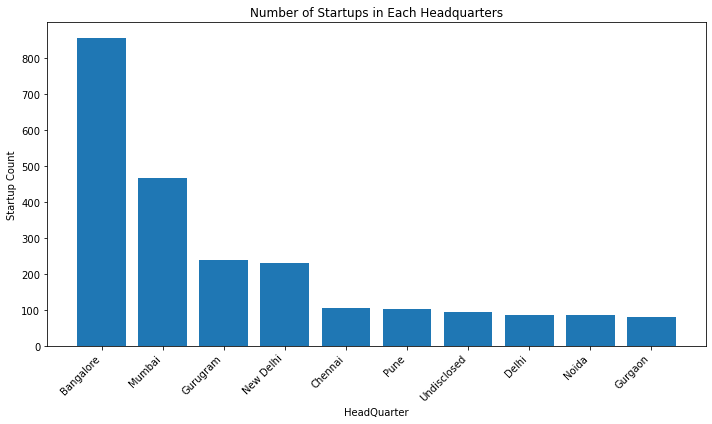

In [15]:
# Construct a histogram to visualize the number of startups in each headquarters
plt.figure(figsize=(10, 6))
plt.bar(startup_count_per_hq_sorted['HeadQuarter'], startup_count_per_hq_sorted['Startup Count'])
plt.xlabel('HeadQuarter')
plt.ylabel('Startup Count')
plt.title('Number of Startups in Each Headquarters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Question 4

### What is the average funding amount received by start-ups in India during this period?


(0.0, 166474393.78151262)

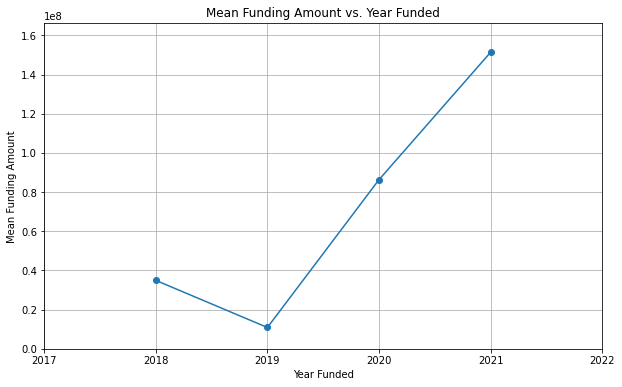

In [38]:
mean_funding_per_year = indian_startups.groupby('Year Funded')['Amount'].mean()


# Calculate the mean funding for each year
mean_funding_per_year = indian_startups.groupby('Year Funded')['Amount'].mean()

# Extract the years and mean funding data for plotting
years = mean_funding_per_year.index
mean_funding = mean_funding_per_year.values

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the mean funding against years using a line graph
plt.plot(years, mean_funding, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year Funded')
plt.ylabel('Mean Funding Amount')
plt.title('Mean Funding Amount vs. Year Funded')

# Optional: Customize the appearance (e.g., grid, axis limits, etc.)
plt.grid(True)
plt.xlim(min(years) - 1, max(years) + 1)  # Set the x-axis limits with some padding
plt.ylim(0, max(mean_funding) * 1.1)  # Set the y-axis limits with some padding

# Show the plot

## Question 5

### Top 10 investors in terms of Amount funded in startups

''

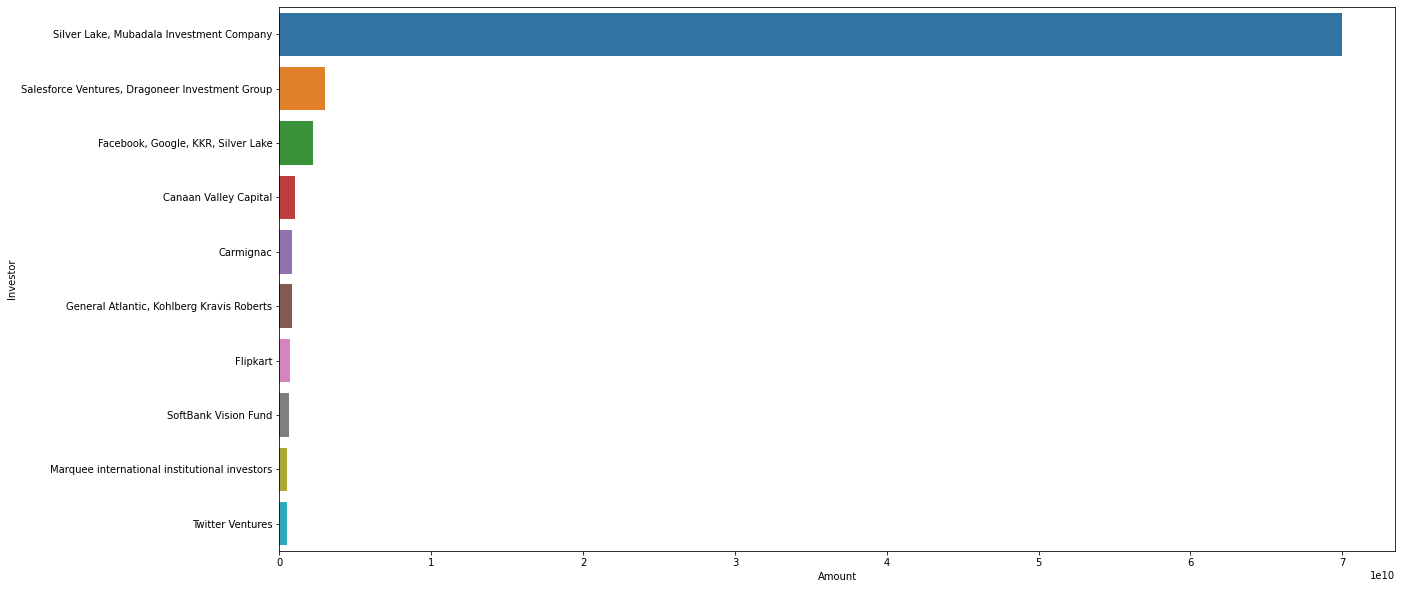

In [52]:
# investors and the number of startups funded
top_10_investors = pd.DataFrame(indian_startups.groupby('Investor')['Amount'].mean().nlargest(10)).reset_index()
top_10_investors.columns = ['Investor', 'Amount']
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_investors, x='Amount', y= 'Investor',orient="h")

;

In [56]:
# investors and the number of startups funded
investors_summary = indian_startups.groupby('Investor').size().reset_index(name='Startup Count')
investors_summary=investors_summary.sort_values(by='Startup Count',ascending=False)
investors_summary=investors_summary.head(10)
investors_summary


,Investor,Startup Count
1358,Unknown,589
1345,Undisclosed,51
1373,Venture Catalysts,44
587,Inflection Point Ventures,40
1315,Titan Capital,21
837,Mumbai Angels Network,20
1302,Tiger Global,20
1128,Sequoia Capital India,17
1441,Y Combinator,17
130,Angel investors,15


<AxesSubplot:xlabel='Startup Count', ylabel='Investor'>

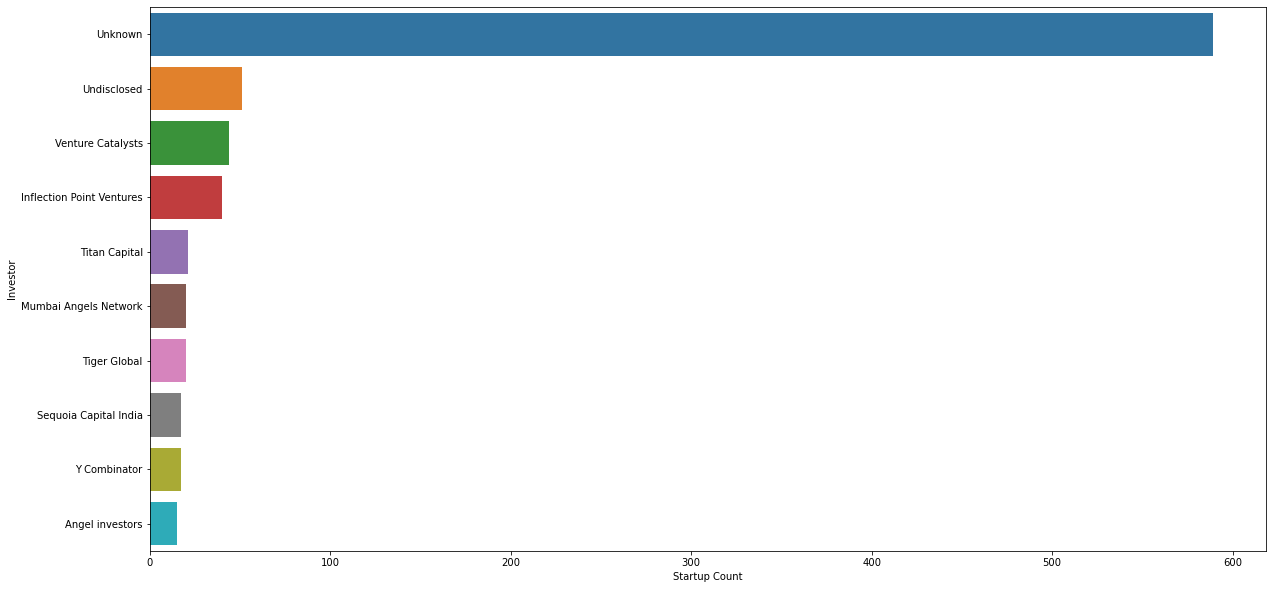

In [59]:
plt.figure(figsize=(20, 10))
sns.barplot(data=investors_summary, x='Startup Count', y= 'Investor',orient="h")